# A Quick Walkthrough of Neural Network Basics

In this notebook, we will explore the fundamental mathematical concepts underlying neural networks through practical examples and step-by-step implementations.

## Overview

This walkthrough covers:
- Basic neural network architecture
- Mathematical foundations (forward propagation, backpropagation)
- Hands-on implementation examples
- Key concepts and terminology

Let's dive into the fascinating world of neural networks and understand how they learn from data!

In [1]:
# package imports
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import time

## Problem Formulation

**Goal:** Find $y = f(x)$ from training data

**Training data:** 
$$D = \{(x_i, y_i = f(x_i) + \epsilon_i): i = 1, 2, \ldots, n\},$$
where $\epsilon_i$ is i.i.d. random noise.

**Function space:** A class of parameterized functions represented by neural networks:
$$\mathcal{N} = \{ h_\theta: \theta \in \mathbb{R}^m\}$$
We want to select the best approximation of $f$ from $\mathcal{N}$.

**Loss function:** The loss function $L: \mathcal{N} \mapsto \mathbb{R}$ assigns a real number to each function in $\mathcal{N}$. The optimal function is:
$$ h^* = \arg\min_{h\in \mathcal{N}} L(h) $$

The loss function depends on the training data $D$ and can be written as $L[D](h)$. A commonly used loss function is Mean Squared Error (MSE):
$$L(h) = \frac{1}{n} \sum_{i=1}^n |h(x_i) - y_i|^2$$


In [2]:
# Create the function space using a neural network
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
# generate a function of training the model here
# inputs: model, X, y, criterion, optimizer, n_epochs
# outputs: trained model, loss history

def train_model(model, X, y, criterion, optimizer, n_epochs):
    losses = []  # Initialize list to store losses

    for epoch in range(n_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        # Store the loss for plotting
        losses.append(loss.item())

        if (epoch+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}")

    return model, losses

## Example - 2D:

The function to learn is 
$$f(x) = a \sin(x_1) + b \cos(x_2).$$

In [6]:
# Create a non-linear function: y = sin(x1) + cos(x2) as an example
def function_f(x):
    a = 1.0
    b = 2.0
    return a * torch.sin(x[:, 0]) + b * torch.cos(x[:, 1])

n_features = 2
print(f"Input feature dimension: {n_features}")

# Create dataset
n_samples = 1000

X = torch.randn(n_samples, n_features)
y = function_f(X) + 0.1 * torch.randn(n_samples)  # add some noise
y = y.unsqueeze(1)  # make it a column vector
print(f"Dataset shapes: X: {X.shape}, y: {y.shape}")


Input feature dimension: 2
Dataset shapes: X: torch.Size([1000, 2]), y: torch.Size([1000, 1])


In [7]:
# Instantiate the model
model_2d = SimpleNN(n_features, hidden_dim=64, output_dim=1)

# Print basic information about the neural network
print("Neural Network Architecture:")
print(f"- Input dimension: {n_features}")
print(f"- Hidden dimension: 64")
print(f"- Output dimension: 1")
print(f"- Number of layers: 3")
print(f"- Total parameters: {sum(p.numel() for p in model_2d.parameters())}")

print("\nModel structure:")
print(model_2d)

Neural Network Architecture:
- Input dimension: 2
- Hidden dimension: 64
- Output dimension: 1
- Number of layers: 3
- Total parameters: 4417

Model structure:
SimpleNN(
  (fc1): Linear(in_features=2, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)


In [8]:
criterion_2d = nn.MSELoss()  # Mean Squared Error for regression
optimizer_2d = optim.Adam(model_2d.parameters(), lr=0.01)
print("\nLoss function and optimizer:")
print(f"- Loss function: {criterion_2d}")
print(f"- Optimizer: {optimizer_2d}")


Loss function and optimizer:
- Loss function: MSELoss()
- Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


Epoch [100/500], Loss: 0.0123
Epoch [200/500], Loss: 0.0103
Epoch [300/500], Loss: 0.0098
Epoch [400/500], Loss: 0.0096
Epoch [500/500], Loss: 0.0093
Training takes 0.30 seconds


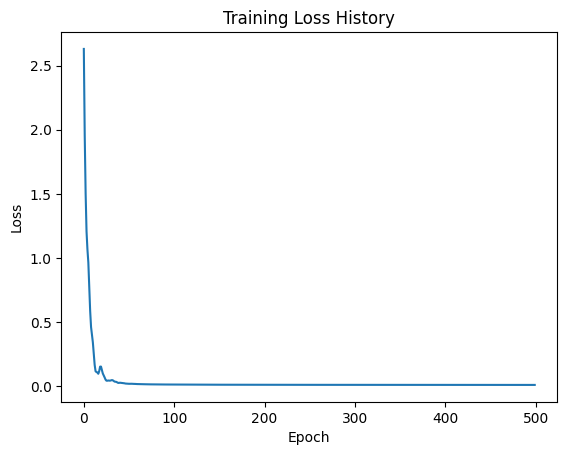

In [9]:

# train the model
n_epochs = 500

# timing start
start_time = time.time()
trained_model_2d, loss_history_2d = train_model(model_2d, X, y, criterion_2d, optimizer_2d, n_epochs)
end_time = time.time()
print(f'Training takes {end_time - start_time:.2f} seconds')

# plot the loss history
plt.plot(loss_history_2d)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.show()

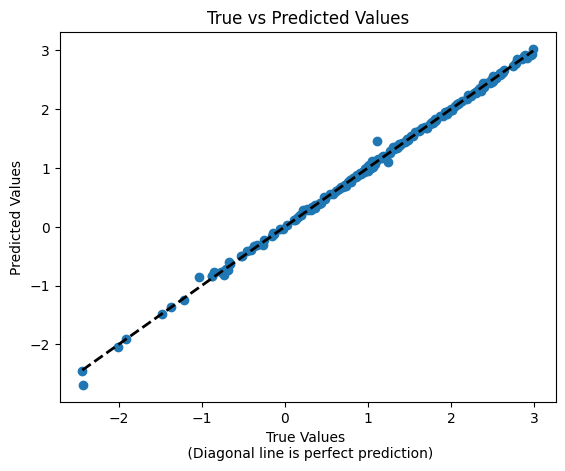

In [10]:
# Create test data and visualize results
n_test_samples = 200
X_test = torch.randn(n_test_samples, n_features)
y_test = function_f(X_test)
y_test = y_test.unsqueeze(1)  # make it a column vector
model_2d.eval()
with torch.no_grad():
    y_pred = trained_model_2d(X_test)  
# plot true vs predicted
plt.scatter(y_test.numpy(), y_pred.numpy())
plt.xlabel('True Values \n (Diagonal line is perfect prediction)')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


- Conclusion: The result from above shows that NN works pretty good. Of course, we can do some robustness test by changing $a, b$, NN structure, and lr, etc. After 500 epochs, the loss function is stable at the level below $0.01$.

## Example - 1D

The function to be learned is
$$f(x) = a \sin (2\pi x) + b \cos (2 \pi x).$$

In [34]:
# another example on 1-D regression with MSELoss
def function_f_1d(x):
    a = 1.0
    b = 0.0
    return a * torch.sin(2 * np.pi * x[:, 0]) + b * torch.cos(2 * np.pi * x[:, 0])

n_features = 1
print(f"Input feature dimension: {n_features}")

# Create dataset
n_samples = 2000

X = torch.rand(n_samples, n_features) # choose samples uniformly on [0,1]
y = function_f_1d(X) + 0.1 * torch.randn(n_samples)  # add some noise
y = y.unsqueeze(1)  # make it a column vector
print(f"Dataset shapes: X: {X.shape}, y: {y.shape}")

Input feature dimension: 1
Dataset shapes: X: torch.Size([2000, 1]), y: torch.Size([2000, 1])


In [35]:

# Instantiate the model
model_1d = SimpleNN(n_features, hidden_dim=64, output_dim=1)
# Print basic information about the neural network
print("\nModel structure:")
print(model_1d)

criterion_1d = nn.MSELoss()  # Mean Squared Error for regression
optimizer_1d = optim.Adam(model_1d.parameters(), lr=0.01)
print("\nLoss function and optimizer:")
print(f"- Loss function: {criterion_1d}")
print(f"- Optimizer: {optimizer_1d}")


Model structure:
SimpleNN(
  (fc1): Linear(in_features=1, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)

Loss function and optimizer:
- Loss function: MSELoss()
- Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


Epoch [100/500], Loss: 0.0136
Epoch [200/500], Loss: 0.0107
Epoch [300/500], Loss: 0.0106
Epoch [400/500], Loss: 0.0103
Epoch [500/500], Loss: 0.0103
Training takes 0.32 seconds


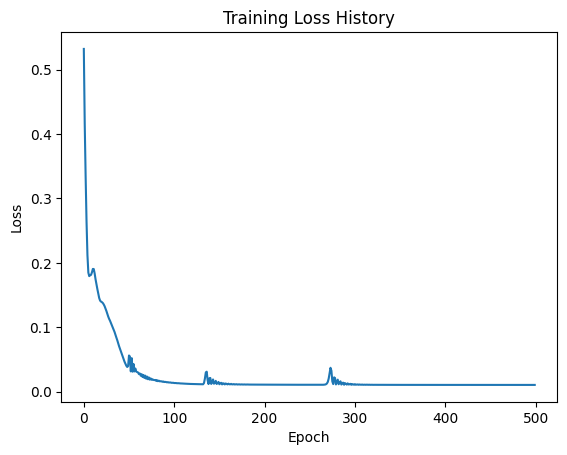

In [36]:
import time

#start timing
start_time = time.time()

# train the model
n_epochs = 500
trained_model_1d, loss_history_1d = train_model(model_1d, X, y, criterion_1d, optimizer_1d, n_epochs)

# end timing
end_time = time.time()

print(f'Training takes {end_time - start_time:.2f} seconds')

# plot the loss history
plt.plot(loss_history_1d)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.show()



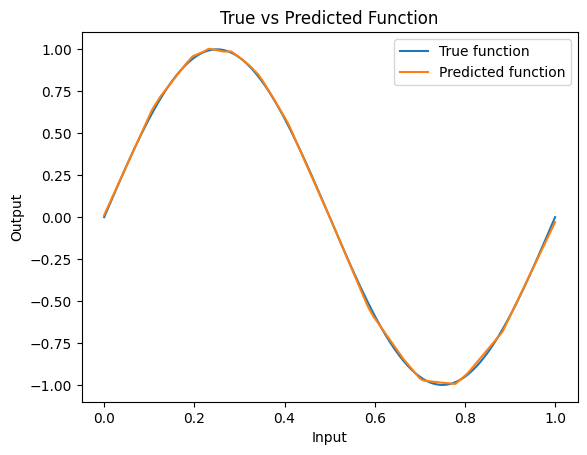

In [37]:
# plot true function and predicted function
X_test = torch.linspace(0, 1, 200).unsqueeze(1)
y_test = function_f_1d(X_test)
model_1d.eval()
with torch.no_grad():
    y_pred = trained_model_1d(X_test)  
# plot true vs predicted
plt.plot(X_test.numpy(), y_test.numpy(), label='True function')
plt.plot(X_test.numpy(), y_pred.numpy(), label='Predicted function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('True vs Predicted Function')
plt.legend()
plt.show()


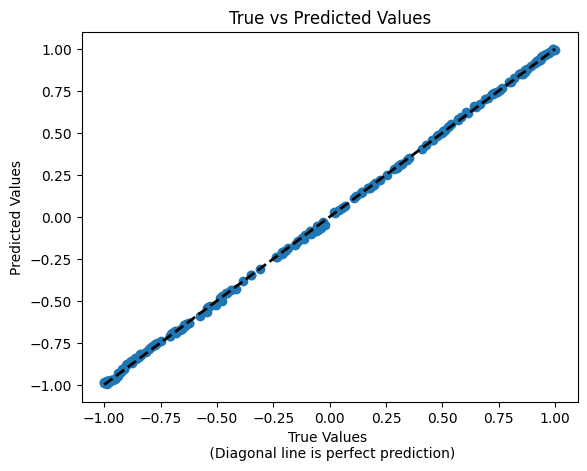

In [39]:
# visualize results
n_test_samples = 200
X_test = torch.rand(n_test_samples, n_features)
y_test = function_f_1d(X_test)
y_test = y_test.unsqueeze(1)  # make it a column vector
model_1d.eval()
with torch.no_grad():
    y_pred = trained_model_1d(X_test)  
# plot true vs predicted
plt.scatter(y_test.numpy(), y_pred.numpy())
plt.xlabel('True Values \n (Diagonal line is perfect prediction)')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


## To-do list

- Let $f(x) = A x$ be a linear function, where $x\in \mathbb R^n$ and $A\in \mathbb R^{m\times n}$. Can SimpleNN do the approximation? The concern is that SimpleNN is nonlinear no matter how $\theta$ is chosen.
- Learn Rosenbrock function